In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis on Constructor and Group in Car Racing

## Data Preparation

In [95]:
f1_results = pd.read_csv('data/results.csv')
f1_constructor = pd.read_csv('data/constructors.csv')
fe_results = pd.read_csv('data/formula_e_race_results.csv')
f1_races = pd.read_csv('data/races.csv')

In [96]:
f1_results['position'] = f1_results['position'].replace('\\N',0)
f1_results['position'] = f1_results['position'].astype(int)

## Constructor Winners in F1 and FE

In [97]:
f1_results_latest10 = f1_results[f1_results['raceId']>=860]
f1_results_latest10_Winner = f1_results_latest10[f1_results_latest10['position']<=3]
f1_results_latest10_Winner_withcon = f1_results_latest10_Winner.merge(f1_constructor,on='constructorId')

In [98]:
f1_Constructor_Winning_Times = f1_results_latest10_Winner_withcon['name'].value_counts()
f1_Constructor_Winning_Times

Mercedes          281
Red Bull          203
Ferrari           176
McLaren            93
Williams           75
Toro Rosso         72
Sauber             66
Lotus F1           64
Haas F1 Team       54
Renault            50
Force India        43
Caterham           24
AlphaTauri         15
Racing Point       15
Marussia           15
HRT                13
Manor Marussia     12
Alfa Romeo         11
Alpine F1 Team      8
Aston Martin        8
Name: name, dtype: int64

<AxesSubplot:title={'center':'F-1 Car Constructor Win Times During Last 10 Years'}>

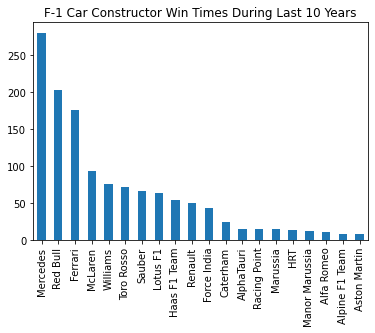

In [99]:
f1_Constructor_Winning_Times.plot.bar(title = "F-1 Car Constructor Win Times During Last 10 Years")

In [100]:
fe_winners = fe_results.iloc[0:213]
fe_winners = fe_winners['team_group'].value_counts()
fe_winners

Audi              43
Nissan-Renault    37
Techeetah         33
Virgin            30
Mahindra          18
BMW-Andretti      14
Dragon             9
Jaguar             8
Venturi            7
NIO-NextEV         6
Mercedes           6
Porsche            2
Name: team_group, dtype: int64

<AxesSubplot:title={'center':'F-E Car Group Win Times in Recent 8 Years'}>

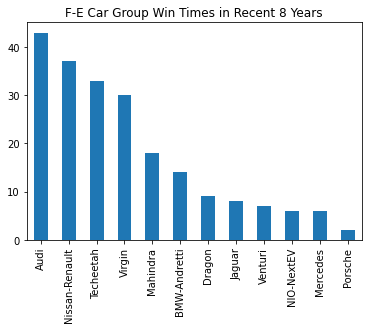

In [101]:
fe_winners.plot.bar(title = "F-E Car Group Win Times in Recent 8 Years")

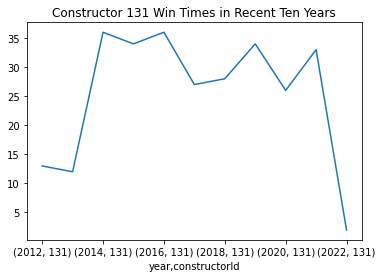

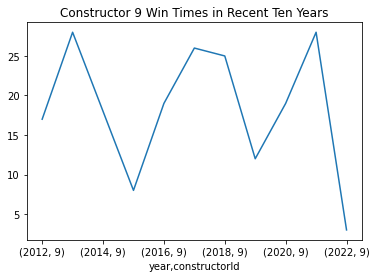

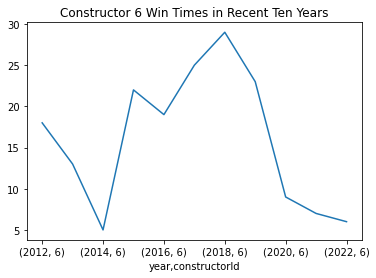

In [102]:
f1_results_latest10_Winner_withrace = f1_results_latest10_Winner.merge(f1_races, on = 'raceId')
f1_results_latest10_Winner_onlyIDandYear = f1_results_latest10_Winner_withrace[['constructorId','year']]
f1_winning_times_count =f1_results_latest10_Winner_onlyIDandYear.groupby('constructorId').count().sort_values(by = 'year',ascending = False).reset_index()
most_times_winners = f1_winning_times_count['constructorId'][0:3].tolist()
for winner in most_times_winners:
    plt.figure()
    constructor = 'Constructor ' + str(winner)
    f1_results_latest10_Winner_onlyIDandYear[f1_results_latest10_Winner_onlyIDandYear['constructorId'] == winner].groupby('year').value_counts().plot.line(title = constructor + ' Win Times in Recent Ten Years')